<a href="https://colab.research.google.com/github/juhumkwon/YOLO/blob/main/yolov8(coco%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 1. 필수 라이브러리 설치

!pip install ultralytics


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



0: 640x416 1 bird, 155.7ms
Speed: 5.0ms preprocess, 155.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)
Detected objects:
x1=54, y1=185, x2=378, y2=547, confidence=0.92, class=14


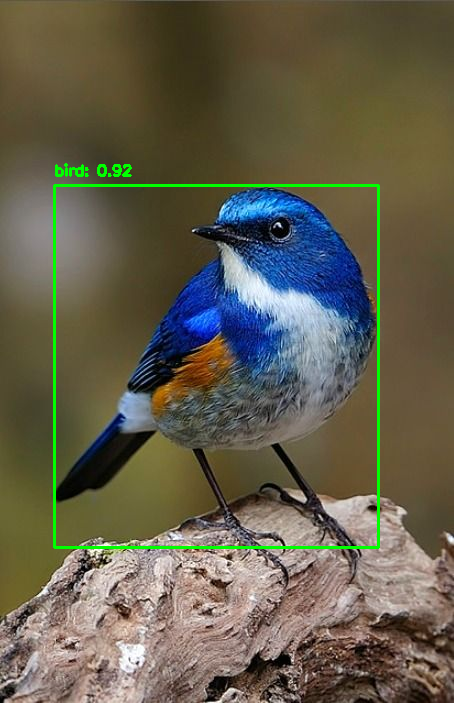

In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

# 모델 불러오기 (전이 학습된 COCO 가중치 사용)
model = YOLO("yolov8n.pt")  # 'n'은 nano 모델로, 경량화된 버전 (속도 우선)

# 이미지 불러오기
def load_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        raise ValueError(f"Unsupported file type: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 추론 및 시각화
def predict_and_visualize(model, image_path, use_colab=True):
    # 이미지 불러오기
    image = load_image(image_path)

    # 모델 추론
    results = model(image)
    # print(model.names) # COCO 클래스 이름 출력
    # print("Results = ", results)

    # 결과 시각화
    for result in results:
        print("Detected objects:")
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
            confidence = box.conf[0]  # 객체 확률
            cls = int(box.cls[0])  # 클래스 ID

            label = f"{model.names.get(cls, f'Unknown({cls})')}: {confidence:.2f}"
            print(f"x1={x1}, y1={y1}, x2={x2}, y2={y2}, confidence={confidence:.2f}, class={cls}")

            # 바운딩 박스 및 텍스트 그리기
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, max(y1 - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 결과 표시 (Colab or 일반 환경)
    if use_colab:
        cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    else:
        plt.figure(figsize=(12, 12))
        plt.imshow(image)
        plt.axis("off")
        plt.title("Predicted Objects")
        plt.show()


# 실행
if __name__ == "__main__":
    image_path = "/content/drive/My Drive/Data/bird.jpg"  # 추론할 이미지 경로
    try:
        predict_and_visualize(model, image_path, use_colab=True)
    except Exception as e:
        print(f"Error: {e}")
